In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.stats import boxcox
from scipy.stats import skew
import scipy as stats 

In [43]:
dataset = pd.read_csv("C:/Users/Admin/Downloads/delivery_time (1).csv")

In [44]:
dataset.head()

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [82]:
dataset.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [65]:
from scipy.stats import skew
print(skew(dataset.delivery_time))

0.326702631656106


In [69]:
dataset[dataset.isnull().any(axis=1)].head()

,delivery_time,sorting_time


In [53]:
dataset[dataset.duplicated()]

,delivery_time,sorting_time


In [54]:
dataset=dataset.rename({'Delivery':'delivery_time', 'Sorting':'sorting_time'},axis=1)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delivery_time'>

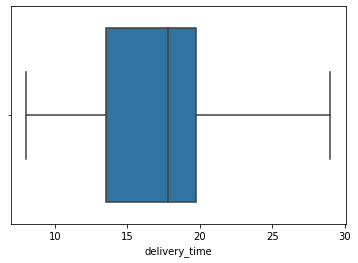

In [66]:
sns.boxplot(dataset['delivery_time'], orient = 'h')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sorting_time'>

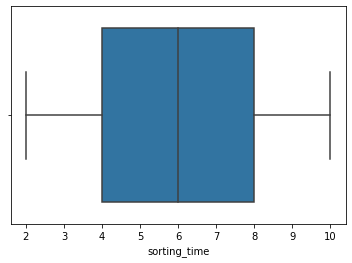

In [67]:
sns.boxplot(dataset['sorting_time'], orient = 'h')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery', ylabel='Density'>

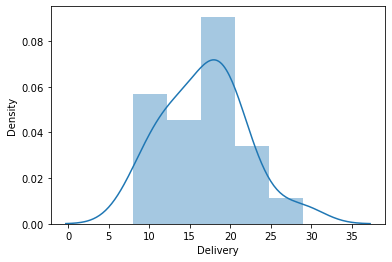

In [49]:
sns.distplot(dataset['delivery_time'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting', ylabel='Density'>

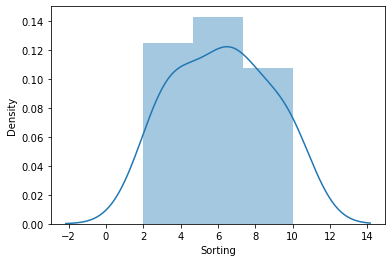

In [50]:
sns.distplot(dataset['sorting_time'])

In [25]:
dataset[dataset.isnull().any(axis=1)].head()

,delivery_time,sorting_time


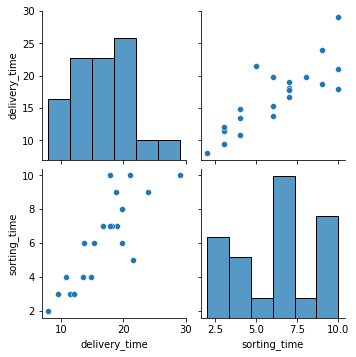

In [26]:
sns.pairplot(dataset)

In [27]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:>

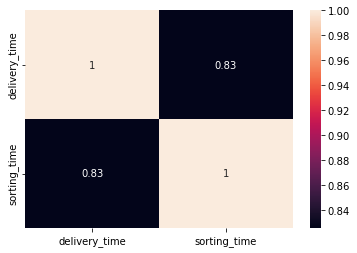

In [70]:
sns.heatmap(dataset.corr(), annot=True)

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

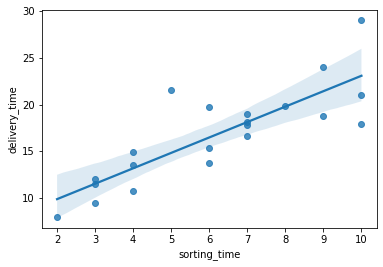

In [28]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

In [29]:
model1=smf.ols("np.log(delivery_time)~np.sqrt(sorting_time)",data=dataset).fit()




In [30]:
model1.params

Intercept                1.519523
np.sqrt(sorting_time)    0.515931
dtype: float64

In [32]:
model1.tvalues , model1.pvalues

(Intercept                8.885685
 np.sqrt(sorting_time)    7.506487
 dtype: float64,
 Intercept                3.405729e-08
 np.sqrt(sorting_time)    4.258181e-07
 dtype: float64)

In [33]:
model1.rsquared , model1.rsquared_adj

(0.747834543427237, 0.7345626772918284)

In [71]:
model2=smf.ols("np.sqrt(delivery_time)~np.sqrt(sorting_time)",data=dataset).fit()


In [72]:
model2.params

Intercept                1.613479
np.sqrt(sorting_time)    1.002217
dtype: float64

In [73]:
model2.tvalues , model1.pvalues

(Intercept                4.628248
 np.sqrt(sorting_time)    7.152817
 dtype: float64,
 Intercept                3.405729e-08
 np.sqrt(sorting_time)    4.258181e-07
 dtype: float64)

In [74]:
model2.rsquared , model1.rsquared_adj

(0.7292011987544664, 0.7345626772918284)

 Model Predictions

In [83]:
new_data=pd.Series([4,9])
new_data

0    4
1    9
dtype: int64

In [84]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,4
1,9


In [85]:
model1.predict(data_pred)

0    2.551384
1    3.067315
dtype: float64

In [86]:
model2.predict(data_pred)

0    3.617912
1    4.620129
dtype: float64